# Download, Read, Parse, and Preprocess Tiny ImageNet

In [1]:
import wget
import zipfile
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Download the data set

In [2]:
# Download Tiny ImageNet
filename = wget.download("http://cs231n.stanford.edu/tiny-imagenet-200.zip")

# Unzip it
with zipfile.ZipFile(filename, 'r') as zip:
    zip.extractall('')

### Read and parse the data set

In [3]:
# Parse class label names
labelnames = []
label2index = {}
with open('tiny-imagenet-200/wnids.txt', 'r') as f:
    lines = f.readlines()
    labelnames = [line.strip() for line in lines]
    label2index = {label: i for i, label in enumerate(labelnames)}

with open('tiny-imagenet-200/words.txt', 'r') as f:
    lines = f.readlines()
    label2words = {}
    for line in lines:
        line = line.strip()
        tokens = line.split()
        label = tokens[0]
        words = ' '.join(tokens[1:])
        label2words[label] = words
        
print(labelnames)    # list of image labels
print(label2index)   # a helper to convert string labels to integer labels (indices). Usage: label2index['n04067472']
print(label2words)   # a helper to convert string labels to human-readable image labels (words). Usage: label2words['n04067472']

['n02124075', 'n04067472', 'n04540053', 'n04099969', 'n07749582', 'n01641577', 'n02802426', 'n09246464', 'n07920052', 'n03970156', 'n03891332', 'n02106662', 'n03201208', 'n02279972', 'n02132136', 'n04146614', 'n07873807', 'n02364673', 'n04507155', 'n03854065', 'n03838899', 'n03733131', 'n01443537', 'n07875152', 'n03544143', 'n09428293', 'n03085013', 'n02437312', 'n07614500', 'n03804744', 'n04265275', 'n02963159', 'n02486410', 'n01944390', 'n09256479', 'n02058221', 'n04275548', 'n02321529', 'n02769748', 'n02099712', 'n07695742', 'n02056570', 'n02281406', 'n01774750', 'n02509815', 'n03983396', 'n07753592', 'n04254777', 'n02233338', 'n04008634', 'n02823428', 'n02236044', 'n03393912', 'n07583066', 'n04074963', 'n01629819', 'n09332890', 'n02481823', 'n03902125', 'n03404251', 'n09193705', 'n03637318', 'n04456115', 'n02666196', 'n03796401', 'n02795169', 'n02123045', 'n01855672', 'n01882714', 'n02917067', 'n02988304', 'n04398044', 'n02843684', 'n02423022', 'n02669723', 'n04465501', 'n02165456'

In [4]:
# a helper function to read images in the dataset
def _readtinyimagenet(dirpath):
    paths = Path(dirpath).glob('*/images/*.*')
    images = []
    labels = []
    for path in paths:
        labelname = path.parent.parent.stem
        label = label2index[labelname]
        with Image.open(path) as image:
            images.append(np.array(image.convert('RGB')))
            labels.append(label)
 
    return np.array(images), np.array(labels)

# Read the data set - this may take several minutes
X_train, Y_train = _readtinyimagenet('tiny-imagenet-200/train')

print(X_train.shape, Y_train.shape)

(100000, 64, 64, 3) (100000,)


### Caching

In [5]:
# Since reading images take a long time, you may benefit from caching the loaded images
np.save('train_images.npy', X_train)
np.save('train_labels.npy', Y_train)

In [6]:
# Later, cached images can be loaded as follows
X_train = np.load('train_images.npy')
Y_train = np.load('train_labels.npy')
print(X_train.shape, Y_train.shape)

(100000, 64, 64, 3) (100000,)


### Visualize the data set

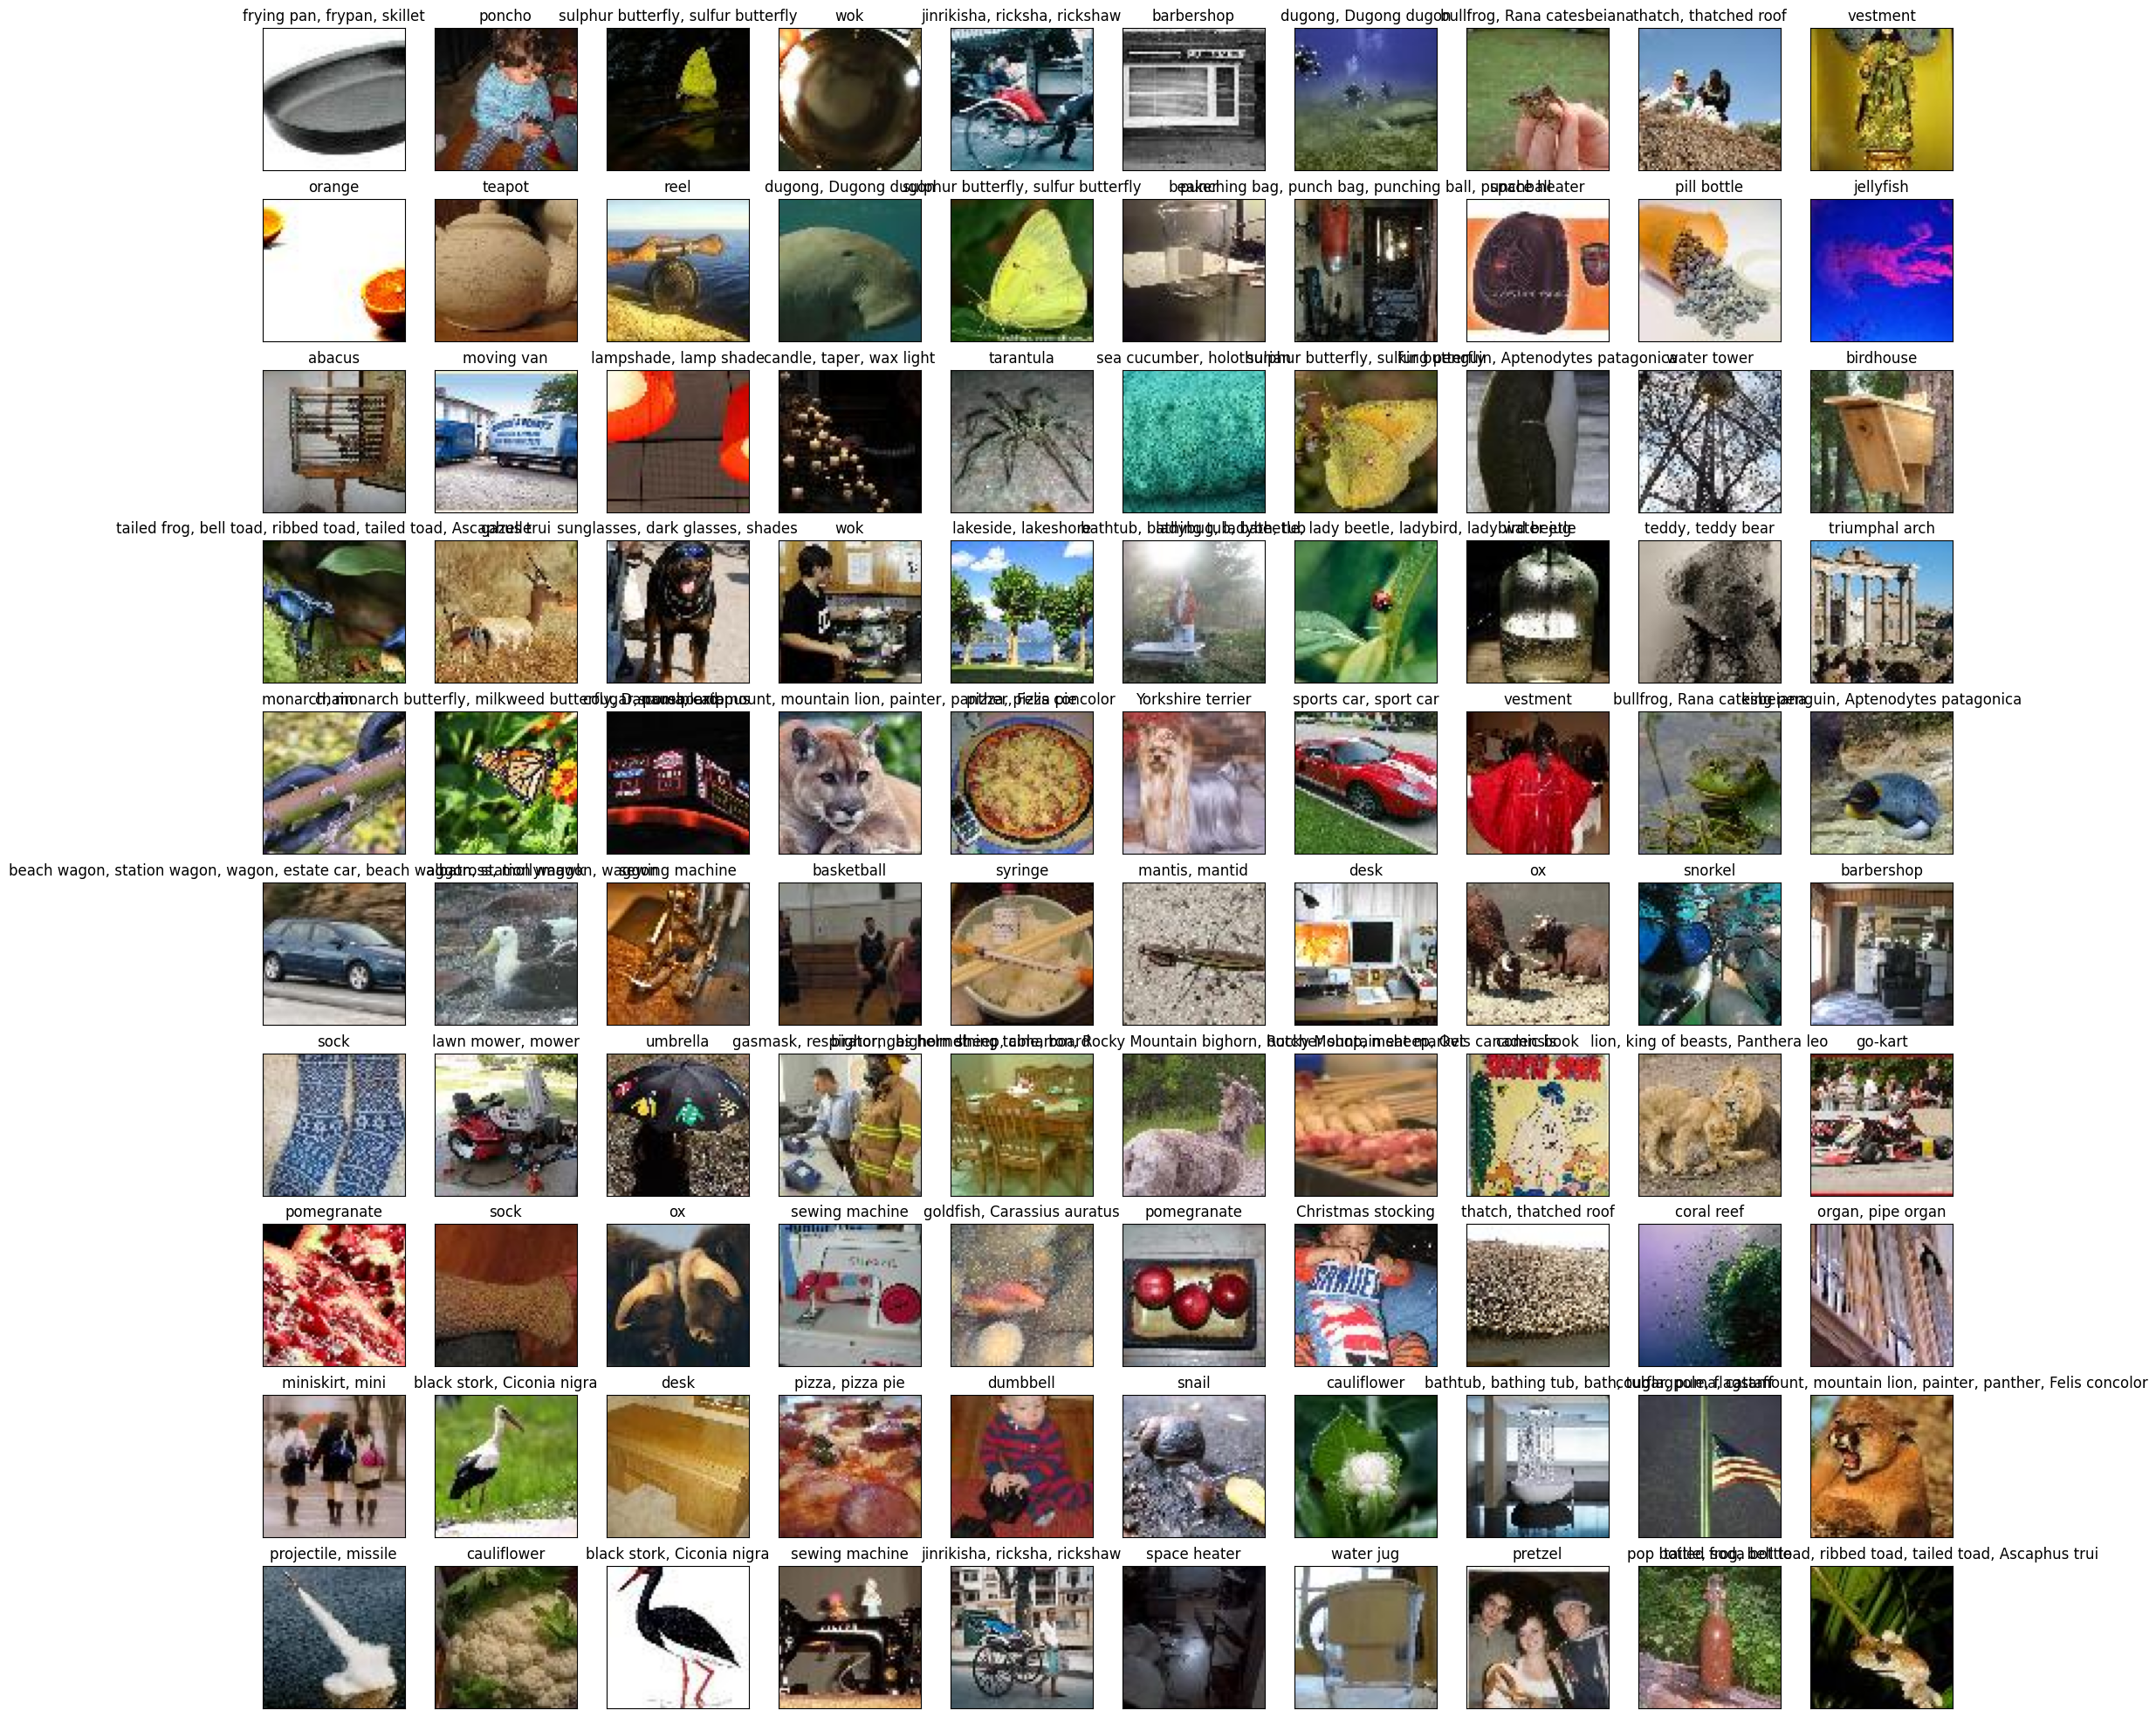

In [7]:
# Visualize the samples
plt.figure(figsize=(25,25))
for i in range(100):
    idx = np.random.randint(len(X_train))
    label = labelnames[Y_train[idx]]
    words = label2words[label]
    plt.subplot(10,10,i+1)
    plt.imshow(X_train[idx])
    plt.title(words)
    plt.xticks([])
    plt.yticks([])

### Preprocessing the data set for your ML model

In [8]:
# A useful thing might be to shuffle your data set before training a ML model.
# https://datascience.stackexchange.com/questions/24511/why-should-the-data-be-shuffled-for-machine-learning-tasks
shuffled_idx = np.arange(len(X_train))
np.random.shuffle(shuffled_idx)
X_train = X_train[shuffled_idx]
Y_train = Y_train[shuffled_idx]

In [9]:
# Note that each image is a rank-3 tensor of the shape (64, 64, 3)
height, width, channels = X_train.shape[1:]
print(height, width, channels)
print(X_train.shape)  # Hence, X_train originally is a rank-4 tensor of the shape (number of images, height, width, RGB-channels)

64 64 3
(100000, 64, 64, 3)


In [10]:
# To convert image data (rank-3 tensors) to vectors, you can use the following code
X_train_flat = np.reshape(X_train, (-1, width*height*channels))
print(X_train_flat.shape)  # Now it is a list of vectors (number of images, 64*64*3)

(100000, 12288)


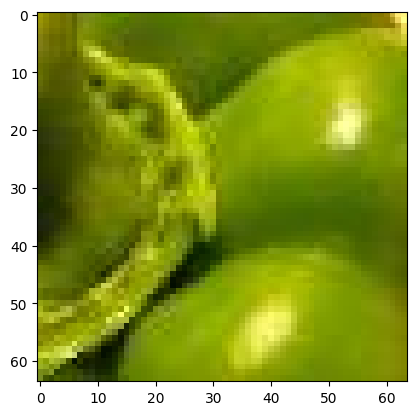

In [11]:
# To revert the vector-represented image back to a rank-3 tensor, you can do the following
plt.imshow(np.reshape(X_train[0], (height, width, channels)))

In [12]:
# In addition, the image labels (Y_train) is a list of indices at the moment.
# You will need to convert them to a dummy variable representation or a one-hot encoded representation.
# Below is the code to do that conversion.
def onehot(y, k):
    probs = np.zeros((len(y),k))
    for i, p in enumerate(y):
        probs[i][p] = 1
    return probs

n_labels = len(labelnames)
Y_train_bin = onehot(Y_train, n_labels)
print(Y_train.shape, Y_train_bin.shape)

(100000,) (100000, 200)
